In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

In [2]:
#Loading Iris data
data = pd.read_csv("iris.csv",header=None)
data.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data_val=data.values

def classify_One_One(s):
    if s=='Iris-versicolor':
        return 1
    elif  s=='Iris-setosa':
        return 0
    elif s=='Iris-virginica' :
        return 2

data['num_class'] = data['class'].apply(lambda x: classify_One_One(x))
data =data.drop(columns=['class'])


## 1.	(20 points) Design and implement a gradient approach to determine the first dimension of the PCA transformation (compute derivatives). Suggestion minimize the Lagrange function.

In [162]:
def gen_eigen_power(A, num_simulations):
    #A_def=A_def.reshape((A.shape[0], 1))
    est_eigen = np.random.rand(A.shape[1])
    lambd=0
    for iter in range(num_simulations):
        est_eigen_n = np.dot(A, est_eigen)
        est_eigen_n_norm = np.linalg.norm(est_eigen_n)
        est_eigen = est_eigen_n / est_eigen_n_norm
        lambd=est_eigen_n_norm
    return est_eigen,lambd

eig_vec,lambd = gen_eigen_power(np.array([[1.0, 2, 0], [-2, 1, 2], [1, 3, 1]]), 10)
print(eig_vec,lambd)

[ 0.40824782  0.40824378  0.81649907] 2.99993823872


### Using Gradient descent-- Theory

$ Variance= V\Sigma V^T $

The goal is to maximize variance with the constraint that the new vector be a unit vector.
$ VV^T =1 $

Using Lagrange multipliers to maximize with constraints

$ L= V\Sigma V^T  -\lambda(VV^T - 1) $

Maximizing the Lagrange function.

$ \displaystyle \frac{\partial}{\partial{\lambda}} = -1* (VV^T - 1) $

$ \displaystyle \frac{\partial}{\partial{V}} = 2* (\Sigma V - \lambda V) $

Maximizing , implies gradient ascent

$\displaystyle V= V + \frac{\partial}{\partial{V}} \eta $

$\displaystyle \lambda= \lambda + \frac{\partial}{\partial{\lambda}} \eta $

The above equations are implemented in the code below

Iterate till 

$ \displaystyle \frac{\partial}{\partial{V}} = 0 $



In [367]:
A=np.array([[1.0, 2, 3], [3, 4, 5], [2, 6, -2]])
A=A - np.mean(A, axis=0) # center the mean
A

# Gen covariance
Cov = np.cov(A)
Cov

# seed vector is 3X1 in this case
#seed_vec_trans = np.matrix(np.random.random(A.shape[1]))
seed_vec_trans = np.matrix([0.8,0.8,0.8])
seed_vec = np.transpose(seed_vec_trans)

seed_lambda = 10

eta =0.001 # learning rate




In [368]:
del_L_lambda = -1*(np.asscalar(seed_vec_trans* seed_vec -1))
del_L_vec = 2*(Cov*seed_vec - seed_lambda * seed_vec)

seed_vec = seed_vec + eta *del_L_vec
seed_lambda = seed_lambda + del_L_lambda*eta

print(seed_vec, seed_lambda,del_L_lambda, del_L_vec )

[[ 0.784]
 [ 0.784]
 [ 0.784]] 9.99908 -0.9200000000000004 [[-16.]
 [-16.]
 [-16.]]


## 2. (20 points) Design and implement Design a gradient approach to determine the second dimension of the PCA transformation (compute derivatives). Suggestion minimize the Lagrange function

## Calculation of the second eigen value/vector involves deflation where the first eigen value is reduced to 0.

In [370]:
import numpy.linalg as la
#eig_vec,lambd = gen_eigen_power(np.array([[1.0, 2, 0], [-2, 1, 2], [1, 3, 1]]), 10)
eig_vec,lambd = gen_eigen_power(np.array([[1.0, 2, 0], [-2, 1, 2], [1, 3, 1]]), 100)
print("Eigen Vector1 =%s, lambda1=%s" %(eig_vec,lambd))


def deflate(A,eig_vec,lambd):
    vec=eig_vec/la.norm(eig_vec)
    sub=vec*np.transpose(vec)
    sub=lambd*vec
    A= A - sub
    return A

A_def = deflate(np.array([[1.0, 2, 0], [-2, 1, 2], [1, 3, 1]]),eig_vec,lambd)
print("Deflated Matrix = %s" %(A_def))


# Calculate second Eigen-vector 
eig_vec2,lambd2 = gen_eigen_power(A_def, 100)
print("Eigen Vector2 =%s, lambda2=%s" %(eig_vec2,lambd2))


Eigen Vector1 =[ 0.40824829  0.40824829  0.81649658], lambda1=3.0
Deflated Matrix = [[-0.22474487  0.77525513 -2.44948974]
 [-3.22474487 -0.22474487 -0.44948974]
 [-0.22474487  1.77525513 -1.44948974]]
Eigen Vector2 =[ 0.37147564  0.92795256 -0.03016444], lambda2=2.65979665742


In [326]:
w, v = la.eig(np.array([[1.0, 2, 3], [3, 4, 5], [2, 6, -2]]))
w,v

(array([ 8.77899701, -0.51981411, -5.2591829 ]),
 array([[ 0.39181166,  0.90738715, -0.29996185],
        [ 0.77108192, -0.35713048, -0.37620055],
        [ 0.50191264, -0.22159961,  0.87663906]]))

### Using Gradient descent for calculating the second principal component-- Theory

$ Variance= V\Sigma V^T $

The first eigen vector is already claculated and is

$ V_1 $

The goal is to maximize variance with the constraint that the new vector be a unit vector.

An additional constraint is imposed which is that the second PC is orthogonal to the first 
$ VV^T =1 $

Using Lagrange multipliers to maximize with constraints

$ L= V\Sigma V^T  -\lambda(VV^T - 1) - \mu (VV_1) $




## 3.	(10 points) Describe the benefit of a gradient approach w.r.t. the SVD approach for the PCA transformation. 

$ A= U\Sigma V^T $

The SVD decomposition is shown above. The algorithm calls for calculation of three matrices which is very expensive. Furthermore the SVD approach generates all the eigen values as opposed to generation of required eigen values for the power method or the gradient approach. In the power method, the calculations are based off on matrix multiplication and not matrix generation. This makes the iterative methods cheaper computationally.

The gradient descent is an iterative method and only involves incremental calculations as opposed to decomposition.

## 4.	(20 points) By using a binary classifier (logistic regression or SVM) please implement in python the 2 different procedure (one vs. one, one vs. other) to handle the problem of more than two different classes (use the iris dataset). For reference use the following link .
https://en.wikipedia.org/wiki/Multiclass_classification

In [84]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_test = train_test_split(data, test_size=0.2, stratify=data['num_class'])
t=pd.DataFrame(X_train['num_class'])
t=t.reset_index(drop=True)

tst=pd.DataFrame(X_test['num_class'])
tst=tst.reset_index(drop=True)

#Scale data
scaler = StandardScaler()
XS_train=pd.DataFrame(scaler.fit_transform(X_train.iloc[:,0:4])) 
XS_train=XS_train.assign(num_class= t)

#Split train data into 3 groups. 1-0n-1
XS_01=(XS_train.loc[(XS_train['num_class']==0) | (XS_train['num_class']==1)]).values
XS_12=(XS_train.loc[(XS_train['num_class']==1) | (XS_train['num_class']==2)]).values
XS_02=(XS_train.loc[(XS_train['num_class']==0) | (XS_train['num_class']==2)]).values



#Scale Test data and divide into 3 groups
XS_test=pd.DataFrame(scaler.transform(X_test.iloc[:,0:4]))
XS_test=XS_test.assign(num_class= tst)

# Gen 3 train groups
XS_train_01=XS_01[:,0:4]
yS_train_01=XS_01[:,4]
XS_train_12=XS_12[:,0:4]
yS_train_12=XS_12[:,4]
XS_train_02=XS_02[:,0:4]
yS_train_02=XS_02[:,4]

# Gen  test groups
XS_test_val =XS_test.values
XS_test_data=XS_test_val[:,0:4]
yS_test_data=XS_test_val[:,4]




In [53]:
# one vs one
# K=3 for Iris dataset, implying 3 classifiers need to be created.

clf_01 = LogisticRegression(random_state=0, solver='lbfgs').fit(XS_train_01,yS_train_01)
clf_12 = LogisticRegression(random_state=0, solver='lbfgs').fit(XS_train_12,yS_train_12)
clf_02 = LogisticRegression(random_state=0, solver='lbfgs').fit(XS_train_02,yS_train_02)


y_pred_01=clf_01.predict(XS_test_data) 
y_pred_12=clf_12.predict(XS_test_data)
y_pred_02=clf_02.predict(XS_test_data)

#pd.DataFrame(y_pred_01,y_pred_12,y_pred_02)
df = pd.DataFrame({'y_pred_01':y_pred_01, 'y_pred_12':y_pred_12, 'y_pred_02':y_pred_02})
df['pred']=df.mode(axis=1)
y_pred = df['pred'].values


#acc=accuracy_score(yS_test, y_pred)
print("Accuracy of 1-on-1=", accuracy_score(yS_test_data, y_pred) )

Accuracy of 1-on-1= 0.966666666667


In [87]:
# one vs rest data preparation

# Data for One-on-many
XS_train_setosa=XS_train.copy()
XS_train_versicolor=XS_train.copy()
XS_train_virginica=XS_train.copy()

def classify_One_Rest(c1,c2): # c1=Target Class, c2=Actual Class
    if c1==c2:
        return 1
    else:
        return 0
    
# setosa=0,versicolor=1,virginica=2

XS_train_setosa['class'] = XS_train_setosa['num_class'].apply(lambda x:classify_One_Rest(x,0))
XS_train_versicolor['class'] = XS_train_versicolor['num_class'].apply(lambda x:classify_One_Rest1(x,1))
XS_train_virginica['class'] = XS_train_virginica['num_class'].apply(lambda x:classify_One_Rest2(x,2))

In [116]:
# one vs rest
# K=3 for Iris dataset, implying 3 classifiers need to be created.

clf_setosa = LogisticRegression(random_state=0, solver='lbfgs').fit(XS_train_setosa.iloc[:,0:4].values,XS_train_setosa.iloc[:,5].values)
clf_versicolor = LogisticRegression(random_state=0, solver='lbfgs').fit(XS_train_versicolor.iloc[:,0:4].values,XS_train_versicolor.iloc[:,5].values)
clf_virginica = LogisticRegression(random_state=0, solver='lbfgs').fit(XS_train_virginica.iloc[:,0:4].values,XS_train_virginica.iloc[:,5].values)

#Predict values
y_pred_setosa=clf_setosa.predict_proba(XS_test_data) 
y_pred_versicolor=clf_versicolor.predict_proba(XS_test_data) 
y_pred_virginica=clf_virginica.predict_proba(XS_test_data) 

df_one_rest = pd.DataFrame({'0':y_pred_setosa[:,1], '1':y_pred_versicolor[:,1], '2':y_pred_virginica[:,1]})
y_argmax=df_one_rest.idxmax(axis=1).values
print("Accuracy of 1-on-rest=", accuracy_score(yS_test_data.astype(int), y_argmax.astype(int)) )

Accuracy of 1-on-rest= 0.933333333333


### Accuracy using 1-on-1 is 0.966 while accuracy using 1-on-rest is 0.933

## 5.	(20 points) Extensively describe the overfitting and underfitting problem. Use execution examples with decision tree and SVM (with or without kernel). Use the scikit implementations.

 Overfitting refers to the phenemon where the model learns the data very well, resulting in also learning noise. When the model is exposed to newer data, where the noise is not present, the model fails to perform adequately. This is known as overfitting. In other words the model is memorizing the data, as opposed to learning from it.

 Underfitting refers to the inability of the model to learn from the data. The parameters of the model are not suited to learn from the provided data.



In [200]:
data = pd.read_csv('sonar.csv',header=None)
data.columns=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 'Class1']
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Class1
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('sonar.csv',header=None)
data.columns=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 'Class1']
data.sample(4)

def classify(x):
    if x=='R':
        return 1
    else:
        return 0

data['Class']=data['Class1'].apply(classify)
data = data.drop(columns=['Class1'])


from sklearn import tree

Y = data['Class']
X = data.drop(['Class'],axis=1)



#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')




NameError: name 'pd' is not defined

In [ ]:
# Usnig SVM with RBF kernel

from sklearn import svm
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score

gamma_rbf = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,
             2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,4,5,6,7,8,9,10]

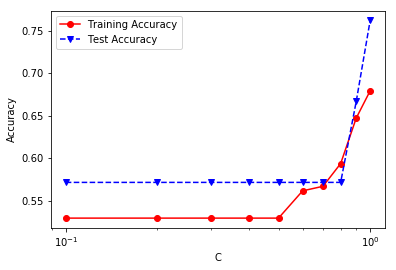

In [206]:
from sklearn.svm import SVC

gamma_rbf = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
SVMtrainAcc = []
SVMtestAcc = []

for param in gamma_rbf:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(gamma_rbf, SVMtrainAcc, 'ro-', gamma_rbf, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

### The plot above illustrates underfitting, where the model is not complicated enough to be expressive. Both the train and test accuracy are very low. The baseline accuracy of the above data set is 53%.

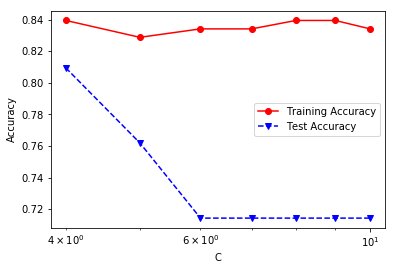

In [208]:
from sklearn.svm import SVC

gamma_rbf = [4,5,6,7,8,9,10]
SVMtrainAcc = []
SVMtestAcc = []

for param in gamma_rbf:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(gamma_rbf, SVMtrainAcc, 'ro-', gamma_rbf, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

### The above model illustrates a case of overfit where the hyperparametrs are too large for the model resulting in the models learning not being genralised enough and causing the test accuracy to plunge.

## 6.	(10 points) Show examples or situations when the using kernel procedure is more efficient in terms of training and prediction computational time w.r.t. polynomial features transformation.  

For training, the computational complexity of a kernel proceedure is given by O(N^3), as the space transformation takes about N^2 nd the inner dot product uses N (or number of features), resulting in N^3.

 On the other hand , use of polynomial features results in the enumeration of the all possible combinations of the features upto the desired degree. For example, if we have degree =3, and two features X,Y, then the combinations are  X,Y,XY,X^2Y,Y^2X,X^3 and Y^3. 

Once we exceed degree =4, the number of combinations quicky multiply resulting in greatr time complexity than a Kernel proceedure.

## 7.	(10 points) Write a procedure to estimate in the SVC classifier (in Scikit) the best kernel (RBF, Polynomial, sigmoid), the best gamma & degree, and the best C. Use the grid search without implement it. Use the following reference: 
a.	https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

b.	https://scikit-learn.org/stable/modules/grid_search.html


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm

X=data.values[:,0:60]
y=data.values[:,60]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

n_splits=10
skf = KFold(n_splits=n_splits,shuffle=True)

parameter_candidates = [
  {'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,4,5,6,7,8,9,10], 'kernel': ['rbf']},
  {'degree': [1,2,3,4,5,6,7,8, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']},
  {'C': [0.1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']}
]

#gamma_rbf = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,4,5,6,7,8,9,10]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
fold=0
for train_index, test_index in skf.split(X, y):
    fold+=1
    X_train1=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    scaler = StandardScaler()
    XS_train=scaler.fit_transform(X_train1) 
    XS_test=scaler.transform(X_test)
    
    clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, cv=5,scoring='accuracy')
    clf.fit(XS_train, y_train)
    print("fold #", fold)
    print("best _params", clf.best_params_)
    
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

fold # 1
best _params {'degree': 1, 'gamma': 0.001, 'kernel': 'poly'}
             precision    recall  f1-score   support

        0.0       0.57      1.00      0.73        12
        1.0       0.00      0.00      0.00         9

avg / total       0.33      0.57      0.42        21




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 2
best _params {'degree': 1, 'gamma': 0.001, 'kernel': 'poly'}
             precision    recall  f1-score   support

        0.0       0.67      1.00      0.80        14
        1.0       0.00      0.00      0.00         7

avg / total       0.44      0.67      0.53        21




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 3
best _params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
             precision    recall  f1-score   support

        0.0       0.43      1.00      0.60         9
        1.0       0.00      0.00      0.00        12

avg / total       0.18      0.43      0.26        21




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 4
best _params {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
             precision    recall  f1-score   support

        0.0       0.57      1.00      0.73        12
        1.0       0.00      0.00      0.00         9

avg / total       0.33      0.57      0.42        21




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 5
best _params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
             precision    recall  f1-score   support

        0.0       0.48      1.00      0.65        10
        1.0       0.00      0.00      0.00        11

avg / total       0.23      0.48      0.31        21




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 6
best _params {'degree': 1, 'gamma': 0.001, 'kernel': 'poly'}
             precision    recall  f1-score   support

        0.0       0.48      1.00      0.65        10
        1.0       0.00      0.00      0.00        11

avg / total       0.23      0.48      0.31        21




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 7
best _params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
             precision    recall  f1-score   support

        0.0       0.57      1.00      0.73        12
        1.0       0.00      0.00      0.00         9

avg / total       0.33      0.57      0.42        21




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 8
best _params {'C': 1000, 'gamma': 0.0001, 'kernel': 'sigmoid'}
             precision    recall  f1-score   support

        0.0       0.29      1.00      0.44         6
        1.0       0.00      0.00      0.00        15

avg / total       0.08      0.29      0.13        21




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 9
best _params {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
             precision    recall  f1-score   support

        0.0       0.70      1.00      0.82        14
        1.0       0.00      0.00      0.00         6

avg / total       0.49      0.70      0.58        20




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


fold # 10
best _params {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
             precision    recall  f1-score   support

        0.0       0.60      1.00      0.75        12
        1.0       0.00      0.00      0.00         8

avg / total       0.36      0.60      0.45        20




C:\Users\sayyapureddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 8.	(20 points) Create examples to explain the property and the importance of the following kernels:
a.	https://en.wikipedia.org/wiki/Graph_kernel

b.	https://en.wikipedia.org/wiki/String_kernel

c.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.sigmoid_kernel.html


### Graph Kernel

An example of a Graph Kernel is the Shortest Path kernel. This kernel finds the similarity of two graphs based on the similarity of the shortest paths in the two graphs.

As an example given G and G`, the kernel can be defined as 

$$ K(G,G^`) =  \sum_{v_i,v_j \in G} \sum_{v_k,v_l \in G^`} k_length(d(v_i,v_j),d(v^`_k,v^`_l)) $$

where $$ k_length = \displaystyle 1 $$ if shortest path distances are equal, else $$ \displaystyle 0 $$

This is useful when comparing protein structures.

### String Kernel

Any Kernel is a function which measures the similarity of two vectors or data points. When a Kernel measures the similarity of two strings, it is said to be a string Kernel. 

As an example consider two strings s and t. s= "strawberry", t= "rawstberry".

$$ S=\{"st", "tr", "ra", "aw", "wb", "be", "er", "rr", "ry"\} $$
$$ T=\{"ra", "aw", "ws", "st", "tb", "be", "er", "rr", "ry"\} $$

A string kernel which looks for the similar 2-grams in both the strings can generate a similarity coefficient or number.

$$ k_{2} (s, t) = \sum_{v \in \sum^2} num_v(s).num_v(t) $$

where $$ \sum^2 = S \cup T $$

In such a case, $$ k_2(S,T)=7 $$

The attractiveness of string kernels is that they enable you to do string operations without having to do feature extraction to compare similarity. As an example string kernels can be used to detect plaigirism by detecting similarities in writing or sentence construction.

Is also useful to compare genomic sequences.

### Sigmoid Kernel

Sigmoid kernel is another name for the Hyperbolic tangent kernel. This function is also an activation function used in Neural networks. Under certain conditions this function approximates the performance of the RBH kernel. A kernel function essentially calculates the similarity of two vectors in space. This helps in making non-linear data linear.

In the sigmoid kernel, the tanh(xy + C) does not normalize the transformation. 

I am not sure why this kernel even exists as this seems like a subset of the RBF. The RBF does normalize with the 
$ \sigma $ whic is not present in the sigmoid.

Mathematically I am not sure how this is more advantageous than the RBF or if there is a subset of data which makes the sigmoid kernel more useful.